# Mall Customers Clustering

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [198]:
# utils 

def visualize_data(data, clusters, title, centroids=None):
    
    plt.figure(figsize=(8, 4))
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=clusters, cmap='viridis')
    if centroids is not None:
        centroids = np.array(centroids)
        plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='X', label='Centroids')
    plt.title(title)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    if centroids is not None:
        plt.legend()
    plt.show()

In [199]:
# import data

data_path = "C:\\Users\\XZ374JM\\OneDrive - EY\\Desktop\\AI Academy\\Deposito-Buda-AI-Academy\\datasets\\mall_customers\\Mall_Customers.csv"

data = pd.read_csv(data_path)

In [200]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [201]:
data.describe() 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [202]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [203]:
data = data.drop(['CustomerID', 'Age', 'Genre'], axis=1)
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [204]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.describe()

,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


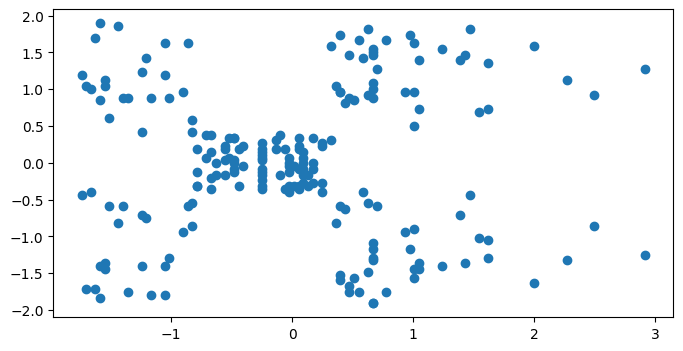

In [205]:
# Visualize the data

plt.figure(figsize=(8, 4))
plt.scatter(data_scaled['Annual Income (k$)'], data_scaled['Spending Score (1-100)'])

In [206]:
# KMeans clustering

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)
print('KMeans')
print('inertia:', kmeans.inertia_)
print('silhoutte:', silhouette_score(data_scaled, kmeans_clusters))

KMeans
inertia: 65.56840815571681
silhoutte: 0.5546571631111091


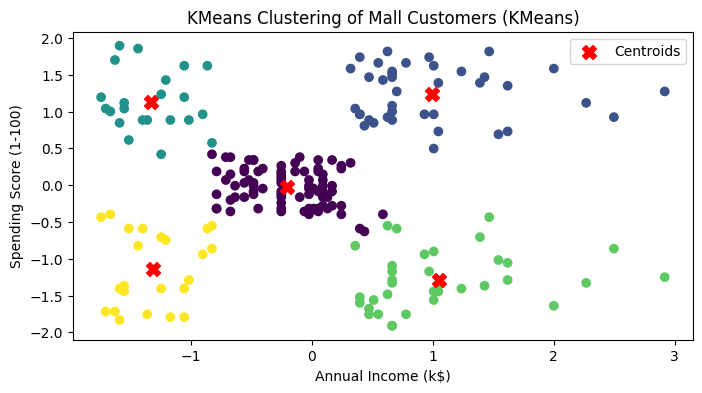

In [207]:
# Visualize results

visualize_data(data_scaled, kmeans_clusters, 'KMeans Clustering of Mall Customers (KMeans)', kmeans.cluster_centers_)

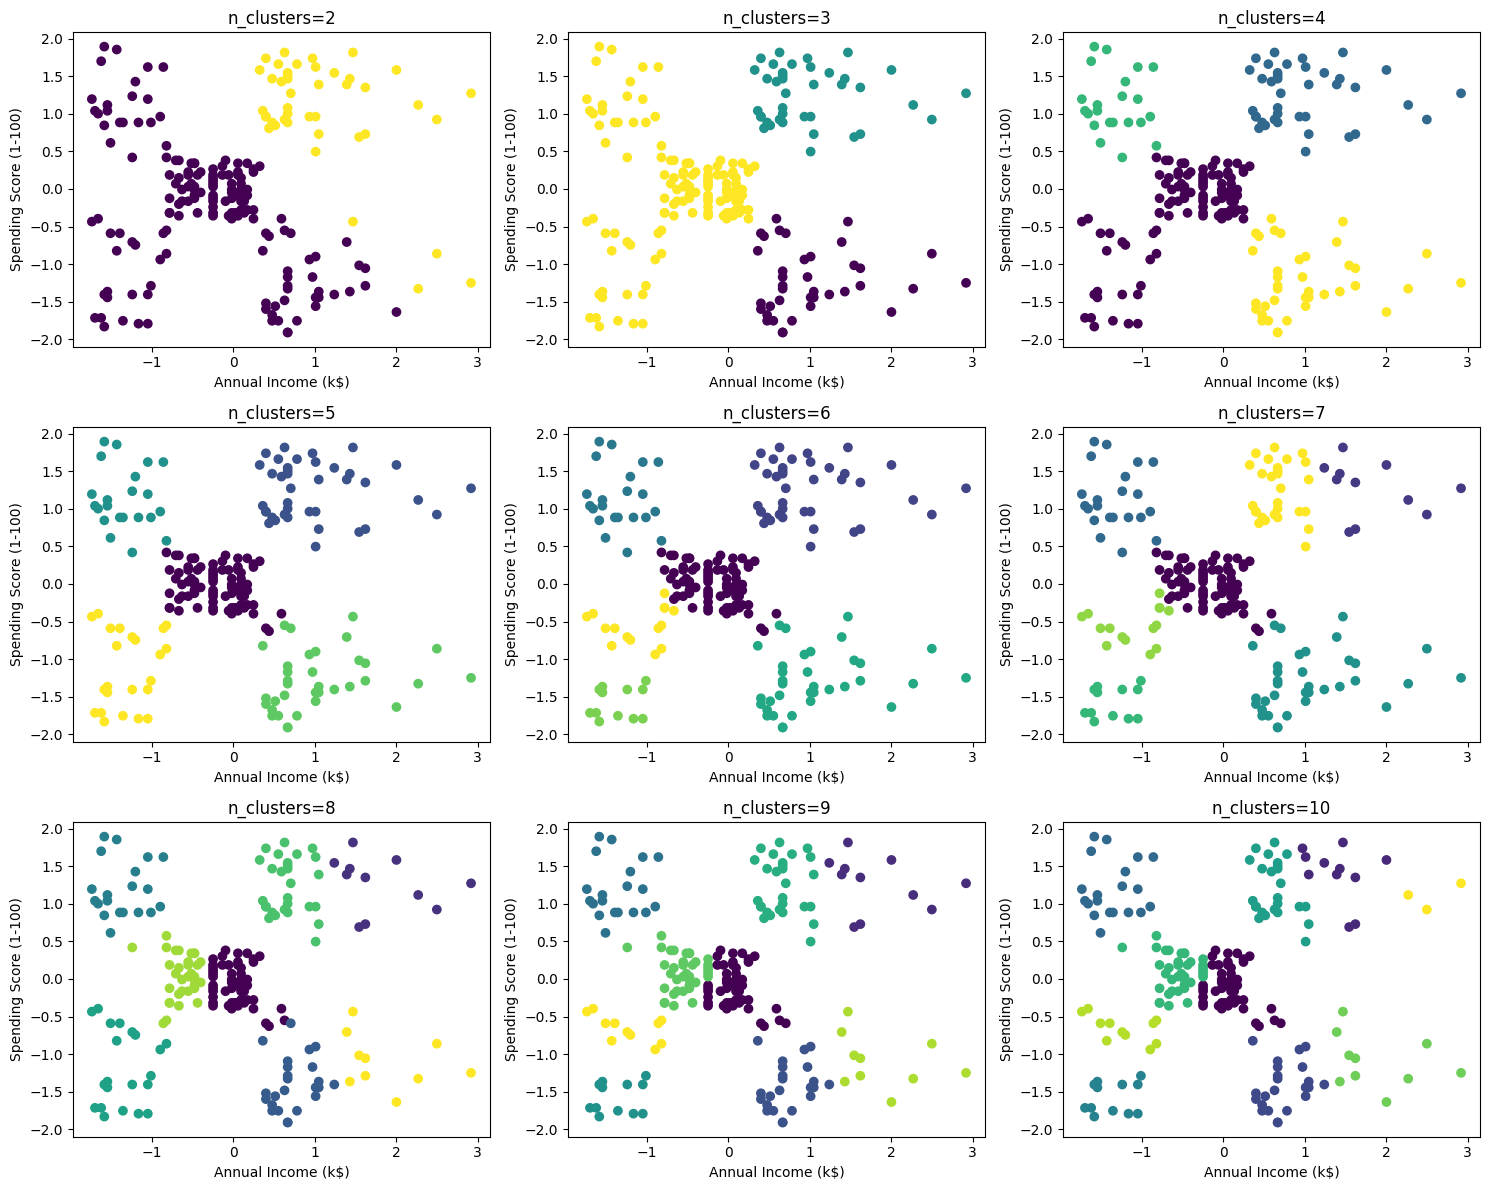

In [208]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

inertia = []
silhouette_scores = []

for idx, n in enumerate(range(2, 11)):
    kmeans = KMeans(n_clusters=n, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, clusters))
    axes[idx].scatter(data_scaled['Annual Income (k$)'], data_scaled['Spending Score (1-100)'], c=clusters, cmap='viridis')
    axes[idx].set_title(f'n_clusters={n}')
    axes[idx].set_xlabel('Annual Income (k$)')
    axes[idx].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()


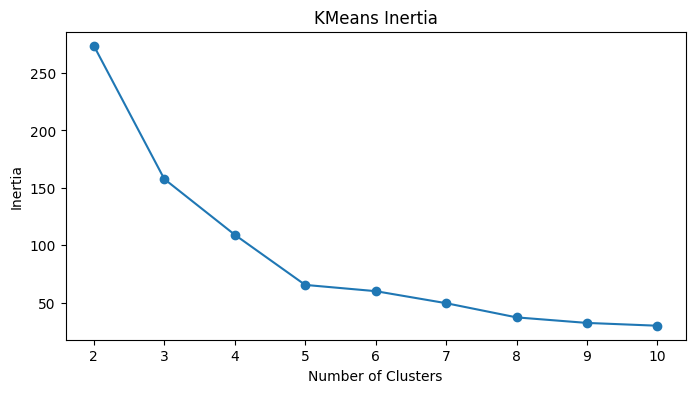

In [209]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('KMeans Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

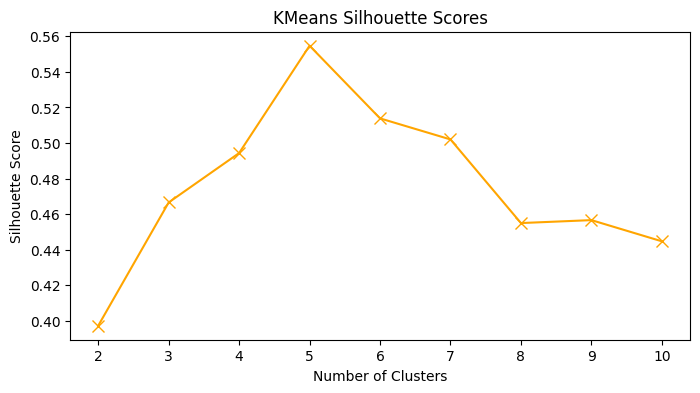

In [210]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='x', color='orange', markersize=8)
plt.title('KMeans Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [211]:
# DBScan clustering

print('DBSCAN')
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_scaled)

DBSCAN


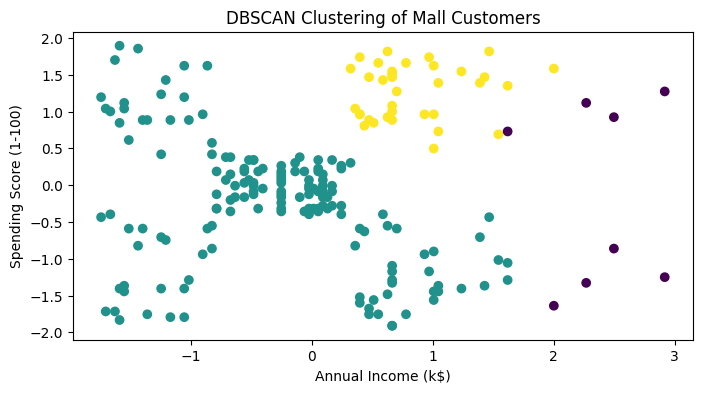

In [212]:
# Visualize results

visualize_data(data_scaled, dbscan_clusters, 'DBSCAN Clustering of Mall Customers')